In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynextsim import NextsimBin

In [2]:
def read_data(field_file):
    # open field_YYYMMDDTHHMMSSZ.bin file with python-tools
    n = NextsimBin(field_file)
    # read coordinates of nodes
    x = n.mesh_info.nodes_x
    y = n.mesh_info.nodes_y
    # read riangulation
    t = n.mesh_info.indices
    # read velocities
    uv = n.get_var('M_VT')
    u = uv[:int(uv.size/2)]
    v = uv[int(uv.size/2):]
    # read concentration and thickness from elements
    sic = n.get_var('Concentration')
    sit = n.get_var('Thickness')
    return n, x, y, t, u, v, sic, sit

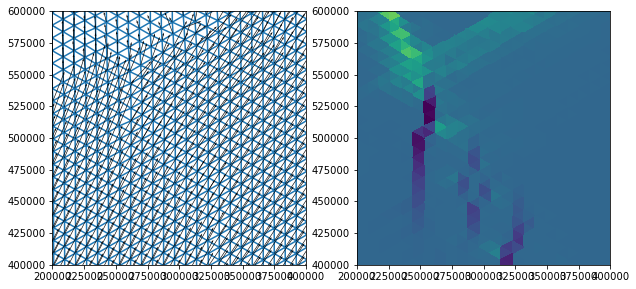

In [3]:
idir = '/data2/antonk/nextsim_ideal_case/'
field_file = f'{idir}/field_20000101T100000Z.bin'

# read data from file
n, x, y, t, u, v, sic, sit = read_data(field_file)

fig, axs = plt.subplots(1,2, figsize=(10,5))
# plot triangulation and velocities
axs[0].triplot(x,y,t)
axs[0].quiver(x,y,u,v,scale=1)
# plot thickness
axs[1].tripcolor(x,y,sit,triangles=t)
for ax in axs:
    ax.set_xlim([200e3, 400e3])
    ax.set_ylim([400e3, 600e3])
    ax.set_aspect('equal')
plt.show()

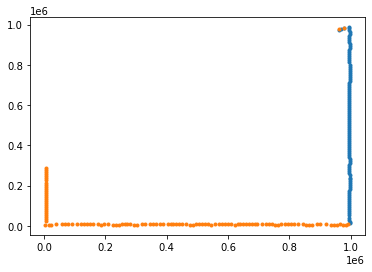

In [4]:
# read files just before remeshing and just after
field_file1 = f'{idir}/field_pre_regrid_20000101T161000Z.bin'
field_file2 = f'{idir}/field_post_regrid_20000101T161000Z.bin'

# read all usual data
n1, x1, y1, t1, u1, v1, sic1, sit1 = read_data(field_file1)
n2, x2, y2, t2, u2, v2, sic2, sit2 = read_data(field_file2)
# also read unique indices of nodes that are kept from output to output
i1 = n1.mesh_info.get_var('id')
i2 = n2.mesh_info.get_var('id')

# find intersection of the nodes before and after remeshing
i12, ii1, ii2 = np.intersect1d(i1, i2, assume_unique=True, return_indices=True)

# find removed nodes on mesh 1 and added nodes on mesh 2
i1[ii1] = 0
removed_nodes = np.where(i1 > 0)[0]
i2[ii2] = 0
added_nodes = np.where(i2 > 0)[0]


plt.plot(x1[removed_nodes], y1[removed_nodes], '.')
plt.plot(x2[added_nodes], y2[added_nodes], '.')
plt.show()